1. 6번 파일(8월 27일 기준 ETF의 구성 종목)에서 시가총액 큰 것 순서대로 etf 추출하기

data1 = 6번파일 / data2 = 1번파일 / data3 = 2번파일

In [1]:
import pandas as pd
data1 = pd.read_csv('data_yoonseo\\NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
result1 = data1.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
ETF_top = result1.sort_values(by='mkt_vlu', ascending=False)
display(ETF_top)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
...,...,...
121,YMAX,48564080
34,HDRO,18093000
95,TSL,10395509
3,AMDL,9788048


1-1. 시총 상위 50개 etf 추출

In [50]:
import pandas as pd
data1 = pd.read_csv('data_yoonseo\\NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
result1 = data1.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
ETF_top50 = result1.sort_values(by='mkt_vlu', ascending=False).head(50)
display(ETF_top50)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
102,VEA,184220461283
103,VIG,93160184864
108,VWO,84908032182
94,TQQQ,71806951554
109,VYM,66157174607


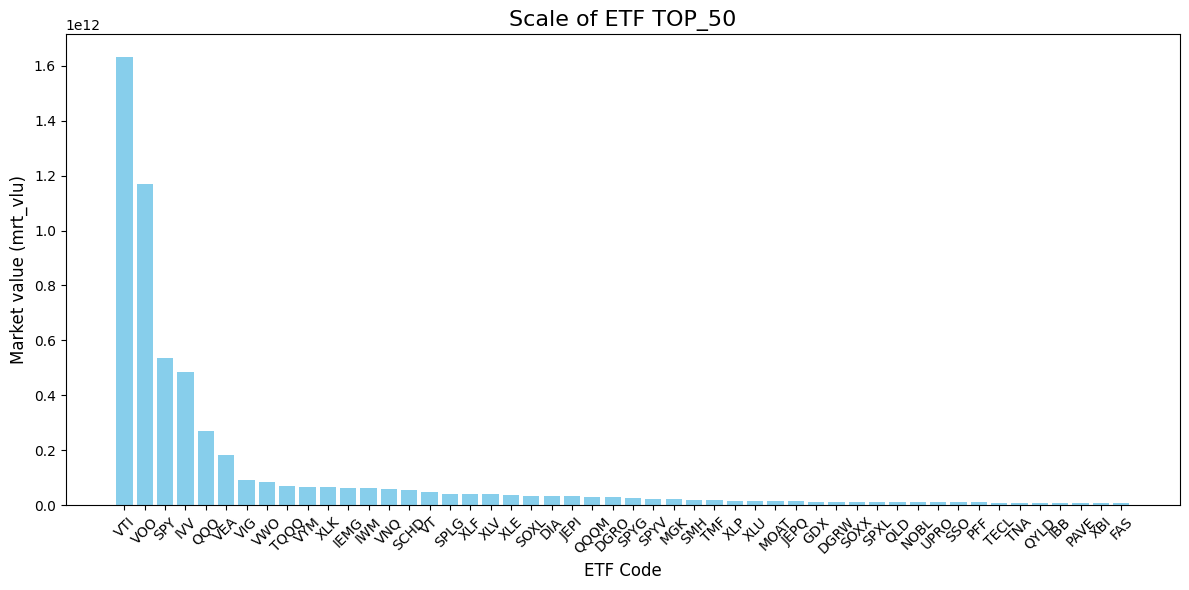

In [52]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(ETF_top50['etf_tck_cd'], ETF_top50['mkt_vlu'], color='skyblue')

# 제목 및 라벨 설정
plt.title('Scale of ETF TOP_50', fontsize=16)
plt.xlabel('ETF Code', fontsize=12)
plt.ylabel('Market value (mrt_vlu)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 회전

# 그래프 표시
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

2. 1번 파일(8월 27일 기준 해외종목 정보)에서 업종분류명, 섹터분류명, 산업명 열 빼와서 6번 파일(8월 27일 기준 ETF의 구성 종목)과 병합하기

In [2]:
data2 = pd.read_csv('C:\\Users\\11\\Downloads\\open\\NH_CONTEST_NW_FC_STK_IEM_IFO.csv', encoding='cp949')
data2_selected = data2[['tck_iem_cd', 'btp_cfc_nm', 'ser_cfc_nm', 'ids_nm', 'mkt_pr_tot_amt']]
merged_result = pd.merge(data1, data2_selected, on='tck_iem_cd', how='inner')
display(merged_result)

,etf_tck_cd,tck_iem_cd,mkt_vlu,fc_sec_eng_nm,fc_sec_krl_nm,stk_qty,wht_pct,sec_tp,btp_cfc_nm,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
0,AAPB,AAPL,36858666,AAPL,애플,215737,66.778,ST,Phones & Smart Phones,Technology,Consumer Electronics,3454684.01
1,AAPB,USD,18337384,US Dollars,프로셰어즈 울트라 반도체,0,33.222,EF,-,-,-,0.00
2,AMDL,USD,3257693,US Dollars,프로셰어즈 울트라 반도체,0,33.282,EF,-,-,-,0.00
3,AMDL,AMD,6530355,AMD,에이엠디,36558,66.718,ST,Semiconductors (NEC),Technology,Semiconductors,242772.28
4,CLOU,TWLO,15400502,TWILIO INC - A,트윌리오,254933,4.266,ST,Software (NEC),Technology,Software - Infrastructure,9743.59
...,...,...,...,...,...,...,...,...,...,...,...,...
18511,TAN,CSIQ,18712550,Canadian Solar Inc,캐나디안 솔라,1382020,1.897,ST,Photovoltaic Solar Systems & Equipment,Technology,Solar,895.02
18512,TAN,AY,18652217,Atlantica Sustainable Infrastructure PLC,아틀란티카 일드,843610,1.891,ST,Alternative Electric Utilities,Utilities,Utilities - Renewable,2588.02
18513,TAN,RNW,7690201,ReNew Energy Global PLC,리뉴 에너지,1296830,0.780,ST,Renewable IPPs,Utilities,Utilities - Renewable,2063.37
18514,TAN,AMPS,5794798,Altus Power Inc,알터스 파워,1833797,0.587,ST,Solar Electric Ultilities,Utilities,Utilities - Renewable,487.97


아래 df = etf명, etf 구성 종목, 보유종목가치, 보유종목비중, 업종분류명, 섹터분류명, 산업명

In [3]:
df=merged_result[['etf_tck_cd','tck_iem_cd', 'mkt_vlu', 'wht_pct','btp_cfc_nm', 'ser_cfc_nm', 'ids_nm']]

VTI 종목들을 섹터분류명(ser_cfc_nm), 총 12개 섹터로 분류

In [4]:
df2=df[df['etf_tck_cd']=='VTI']
display(df2.ser_cfc_nm.nunique())
df3 = df2.groupby('ser_cfc_nm')['wht_pct'].sum().reset_index()
df3

12

,ser_cfc_nm,wht_pct
0,-,0.098
1,Basic Materials,2.153
2,Communication Services,8.578
3,Consumer Cyclical,10.047
4,Consumer Defensive,5.465
5,Energy,3.757
6,Financial Services,12.171
7,Healthcare,11.547
8,Industrials,8.379
9,Real Estate,2.571


3. ETF 구성 종목 개수 (분산투자 정도 파악 목적)

In [5]:
etf_count = data1.groupby('etf_tck_cd')['tck_iem_cd'].count()

result_df = etf_count.reset_index(name='tck_iem_cd_count')
result_df

,etf_tck_cd,tck_iem_cd_count
0,AAPB,2
1,AAPU,10
2,AIQ,85
3,AMDL,2
4,AMZU,7
...,...,...
117,XLU,33
118,XLV,63
119,XYLD,498
120,YINN,12


3. 시가총액 큰 것 순서대로 ETF들의 거래량 내림차순 정렬
2번파일의 acl_trd_qty(누적거래수량) 활용

In [36]:
data3 = pd.read_csv('data_chanwoo/NH_CONTEST_STK_DT_QUT.csv', encoding='cp949')
etf_tck_cd_list = ETF_top['etf_tck_cd'].tolist()

data3['tck_iem_cd'] = data3['tck_iem_cd'].str.strip()
filtered_data3 = data3[data3['tck_iem_cd'].isin(etf_tck_cd_list)]
result1 = filtered_data3.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
result1_sorted = result1.sort_values(by='acl_trd_qty', ascending=False)
result1_sorted

,tck_iem_cd,acl_trd_qty
77,SOXL,4.791392e+09
94,TQQQ,3.532010e+09
83,SPY,3.213682e+09
96,TSLL,3.014736e+09
113,XLF,2.363635e+09
...,...,...
32,GPIX,3.500320e+06
11,ARKX,3.406643e+06
34,HDRO,2.650521e+06
71,RPAR,2.594178e+06


위에서 분석한 데이터 시각화

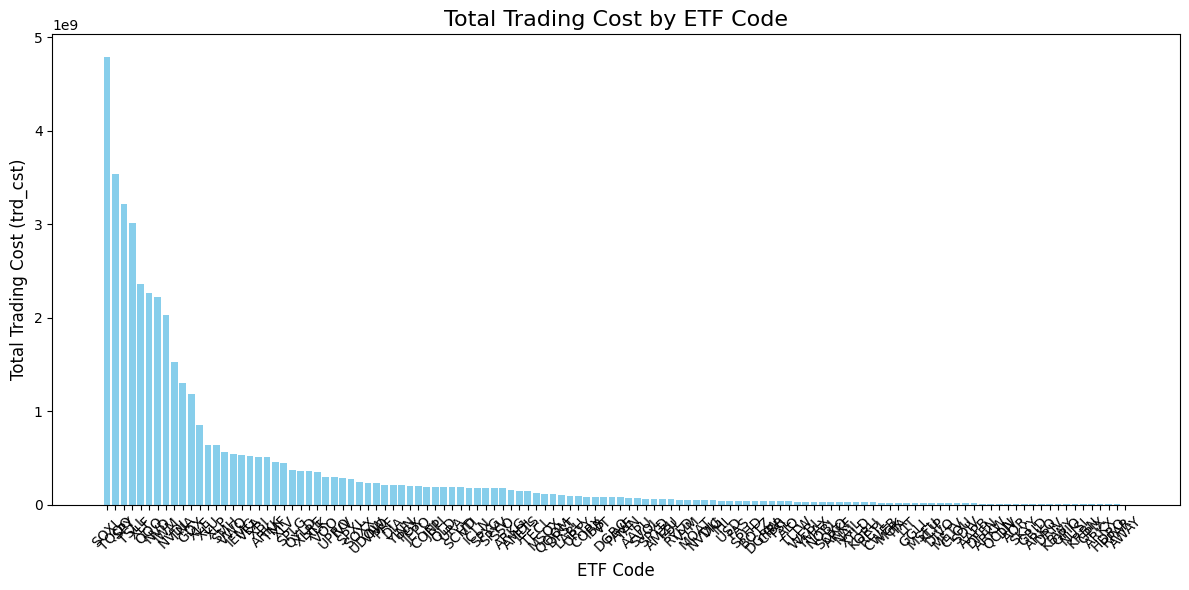

In [37]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(result1_sorted['tck_iem_cd'], result1_sorted['acl_trd_qty'], color='skyblue')

# 제목 및 라벨 설정
plt.title('Total Trading Cost by ETF Code', fontsize=16)
plt.xlabel('ETF Code', fontsize=12)
plt.ylabel('Total Trading Cost (trd_cst)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 회전

# 그래프 표시
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

4. 시가-종가 간 차이와 고가-저가 간 차이 사이의 괴리 파악 (주가 변동성 파악 목적) 

In [38]:
filtered_data3 = data3[data3['tck_iem_cd'].isin(result1_sorted['tck_iem_cd'])]

import numpy as np
# gap_ong_end 열 생성 후, 시가와 종가의 차이를 열에 넣기
filtered_data3['gap_ong_end'] = np.where(
    filtered_data3['iem_ong_pr'] > filtered_data3['iem_end_pr'],
    filtered_data3['iem_ong_pr'] - filtered_data3['iem_end_pr'],
    filtered_data3['iem_end_pr'] - filtered_data3['iem_ong_pr']
)
# gap_hi_low 열 생성, 고가 - 저가를 열에 넣기
filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']
filtered_data3

C:\Users\11\AppData\Local\Temp\ipykernel_21012\199152756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_ong_end'] = np.where(
C:\Users\11\AppData\Local\Temp\ipykernel_21012\199152756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']


,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt,gap_ong_end,gap_hi_low
252,20240627,AAPB,26.36,26.5600,25.7900,26.20,0.21,0.81,227236.0,5953583.0,137347.0,89889.0,1390.1,0.16,0.7700
253,20240625,AAPB,25.05,25.5800,24.9300,25.03,0.21,0.85,155926.0,3902828.0,91537.0,64389.0,1389.7,0.02,0.6500
254,20240718,AAPB,30.10,30.1000,28.0400,28.45,-1.27,-4.27,284823.0,8171305.0,0.0,0.0,1381.5,1.65,2.0600
255,20240528,AAPB,21.36,21.6492,20.8200,21.03,0.04,0.19,119462.0,2512286.0,30618.0,88844.0,1365.4,0.33,0.8292
256,20240719,AAPB,28.64,29.1174,28.2400,28.51,0.06,0.21,128792.0,3665536.0,967606.0,1047838.0,1379.9,0.13,0.8774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193881,20240812,YMAX,17.94,17.9400,17.7000,17.84,-0.02,-0.11,335328.0,5982251.0,373276.0,370157.0,1369.4,0.10,0.2400
193882,20240702,YMAX,19.60,19.6800,19.5600,19.68,0.10,0.51,489837.0,9639966.0,0.0,0.0,1380.8,0.08,0.1200
193883,20240815,YMAX,17.62,17.7580,17.6100,17.65,-0.48,-2.65,410468.0,7244760.0,393831.0,308905.0,1370.3,0.03,0.1480
193884,20240813,YMAX,17.95,18.1500,17.9000,18.14,0.30,1.68,323170.0,5862303.0,311054.0,401700.0,1367.7,0.19,0.2500


In [39]:
# tck_iem_cd를 기준으로 평균 계산
result_avg = filtered_data3.groupby('tck_iem_cd').agg(
    avg_gap_ong_end=('gap_ong_end', 'mean'),
    avg_gap_hi_low=('gap_hi_low', 'mean')
    ).reset_index()
result_avg

# avg_gap_ong_end와 avg_gap_hi_low 기준으로 내림차순 정렬
sorted_result_avg = result_avg.sort_values(by=['avg_gap_ong_end', 'avg_gap_hi_low'], ascending=False).reset_index(drop=True)
sorted_result_avg

,tck_iem_cd,avg_gap_ong_end,avg_gap_hi_low
0,NVDU,4.969603,9.447389
1,USD,4.800635,9.023235
2,SMH,3.918413,7.264497
3,NAIL,3.836032,7.943933
4,QQQ,3.609683,7.022252
...,...,...,...
117,QYLD,0.078730,0.150084
118,DIV,0.077649,0.155935
119,HDRO,0.071348,0.128087
120,RYLD,0.068571,0.149314


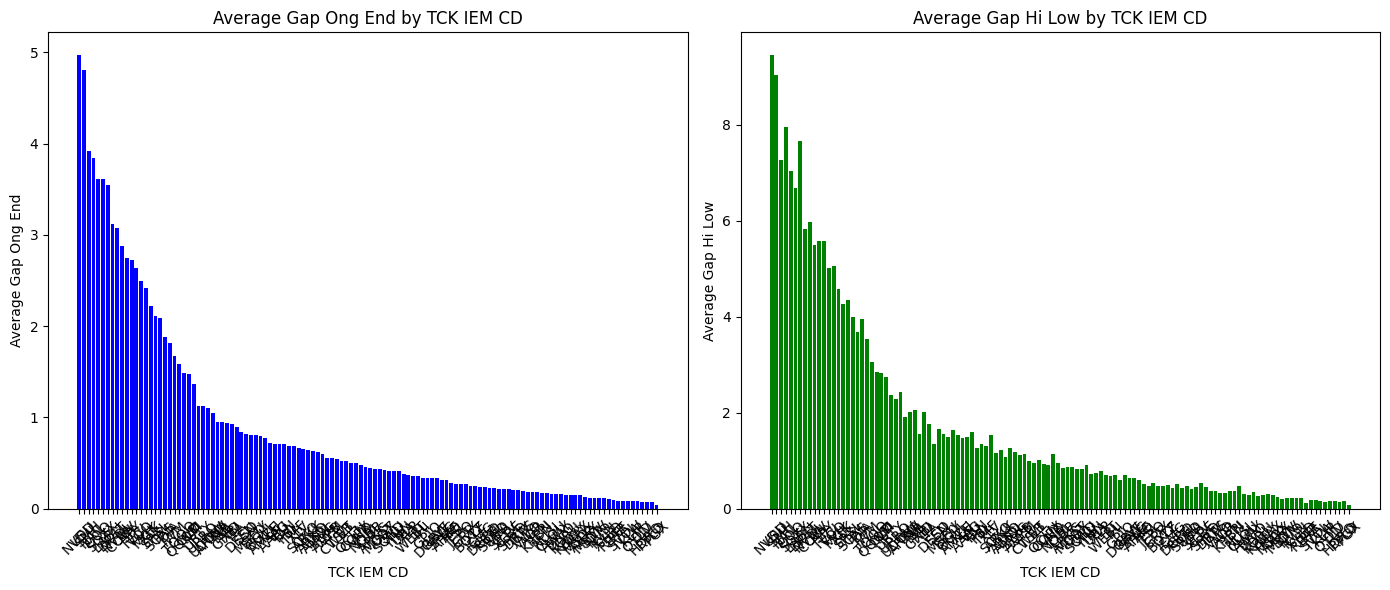

In [40]:
# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 첫 번째 그래프: avg_gap_ong_end
plt.subplot(1, 2, 1)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_ong_end'], color='blue')
plt.title('Average Gap Ong End by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Ong End')
plt.xticks(rotation=45)

# 두 번째 그래프: avg_gap_hi_low
plt.subplot(1, 2, 2)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_hi_low'], color='green')
plt.title('Average Gap Hi Low by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Hi Low')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

4.1 시가-종가 차이, 저가-고가 차이의 평균치를 합산하여 주가 변동성이 큰 순서대로 나열하기

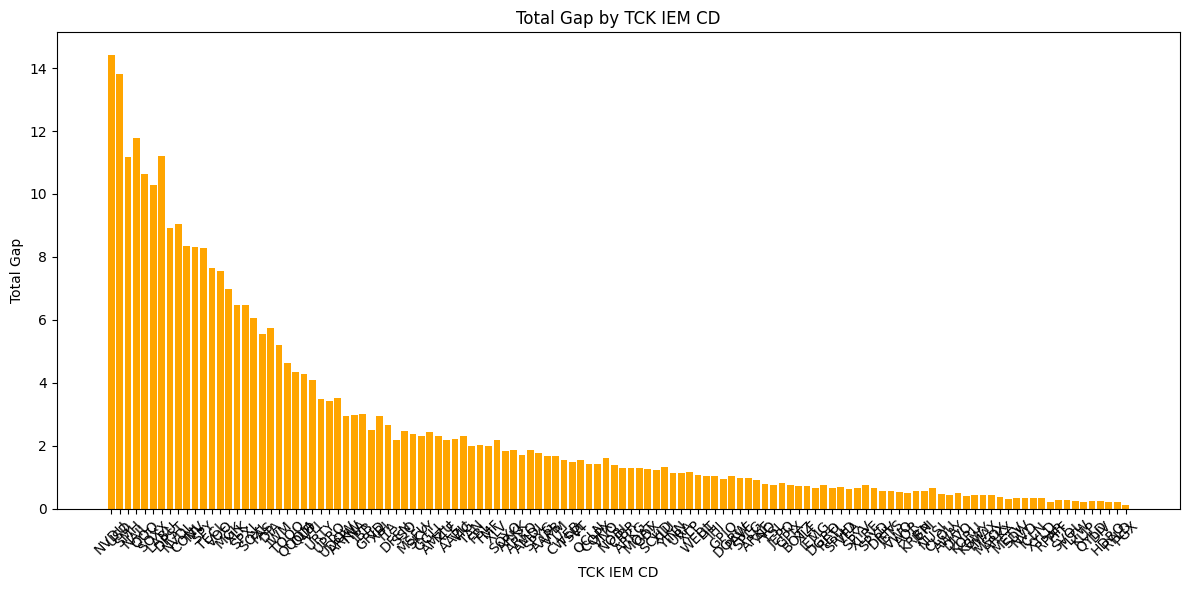

In [41]:
# avg_gap_ong_end와 avg_gap_hi_low의 합을 새로운 열로 추가
sorted_result_avg['total_gap'] = sorted_result_avg['avg_gap_ong_end'] + sorted_result_avg['avg_gap_hi_low']

# 결과를 새로운 데이터 프레임으로 생성
sum_result_avg = sorted_result_avg[['tck_iem_cd', 'total_gap']]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(sum_result_avg['tck_iem_cd'], sum_result_avg['total_gap'], color='orange')
plt.title('Total Gap by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Total Gap')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [42]:
# 구간 정의
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0~2', '2~4', '4~6', '6~8', '8~10', '10~']

# total_gap을 구간으로 나누기
sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)

# 결과 확인
sum_result_avg

C:\Users\11\AppData\Local\Temp\ipykernel_21012\2099080940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)


,tck_iem_cd,total_gap,gap_category
0,NVDU,14.416992,10~
1,USD,13.823870,10~
2,SMH,11.182910,10~
3,NAIL,11.779965,10~
4,QQQ,10.631935,10~
...,...,...,...
117,QYLD,0.228814,0~2
118,DIV,0.233584,0~2
119,HDRO,0.199435,0~2
120,RYLD,0.217886,0~2


위의 sum_result_avg 데이터 프레임 시각화하기 (구간 별로 나눠서)

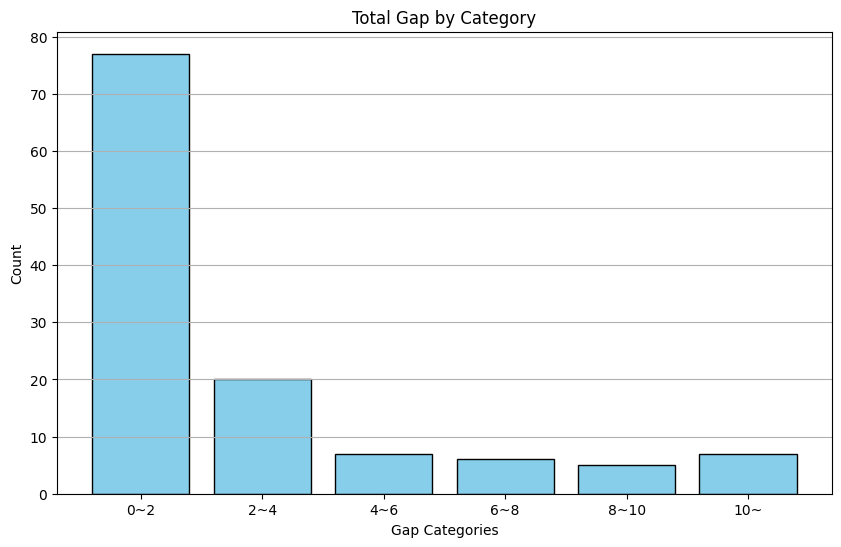

In [45]:
# 각 구간에 속하는 데이터 리스트 생성
gap_data = {label: sum_result_avg[sum_result_avg['gap_category'] == label]['tck_iem_cd'].tolist() for label in labels}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(gap_data.keys(), [len(data) for data in gap_data.values()], color='skyblue', edgecolor='black')
plt.title('Total Gap by Category')
plt.xlabel('Gap Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 그래프 표시
plt.show()

각 구간별 데이터 모음

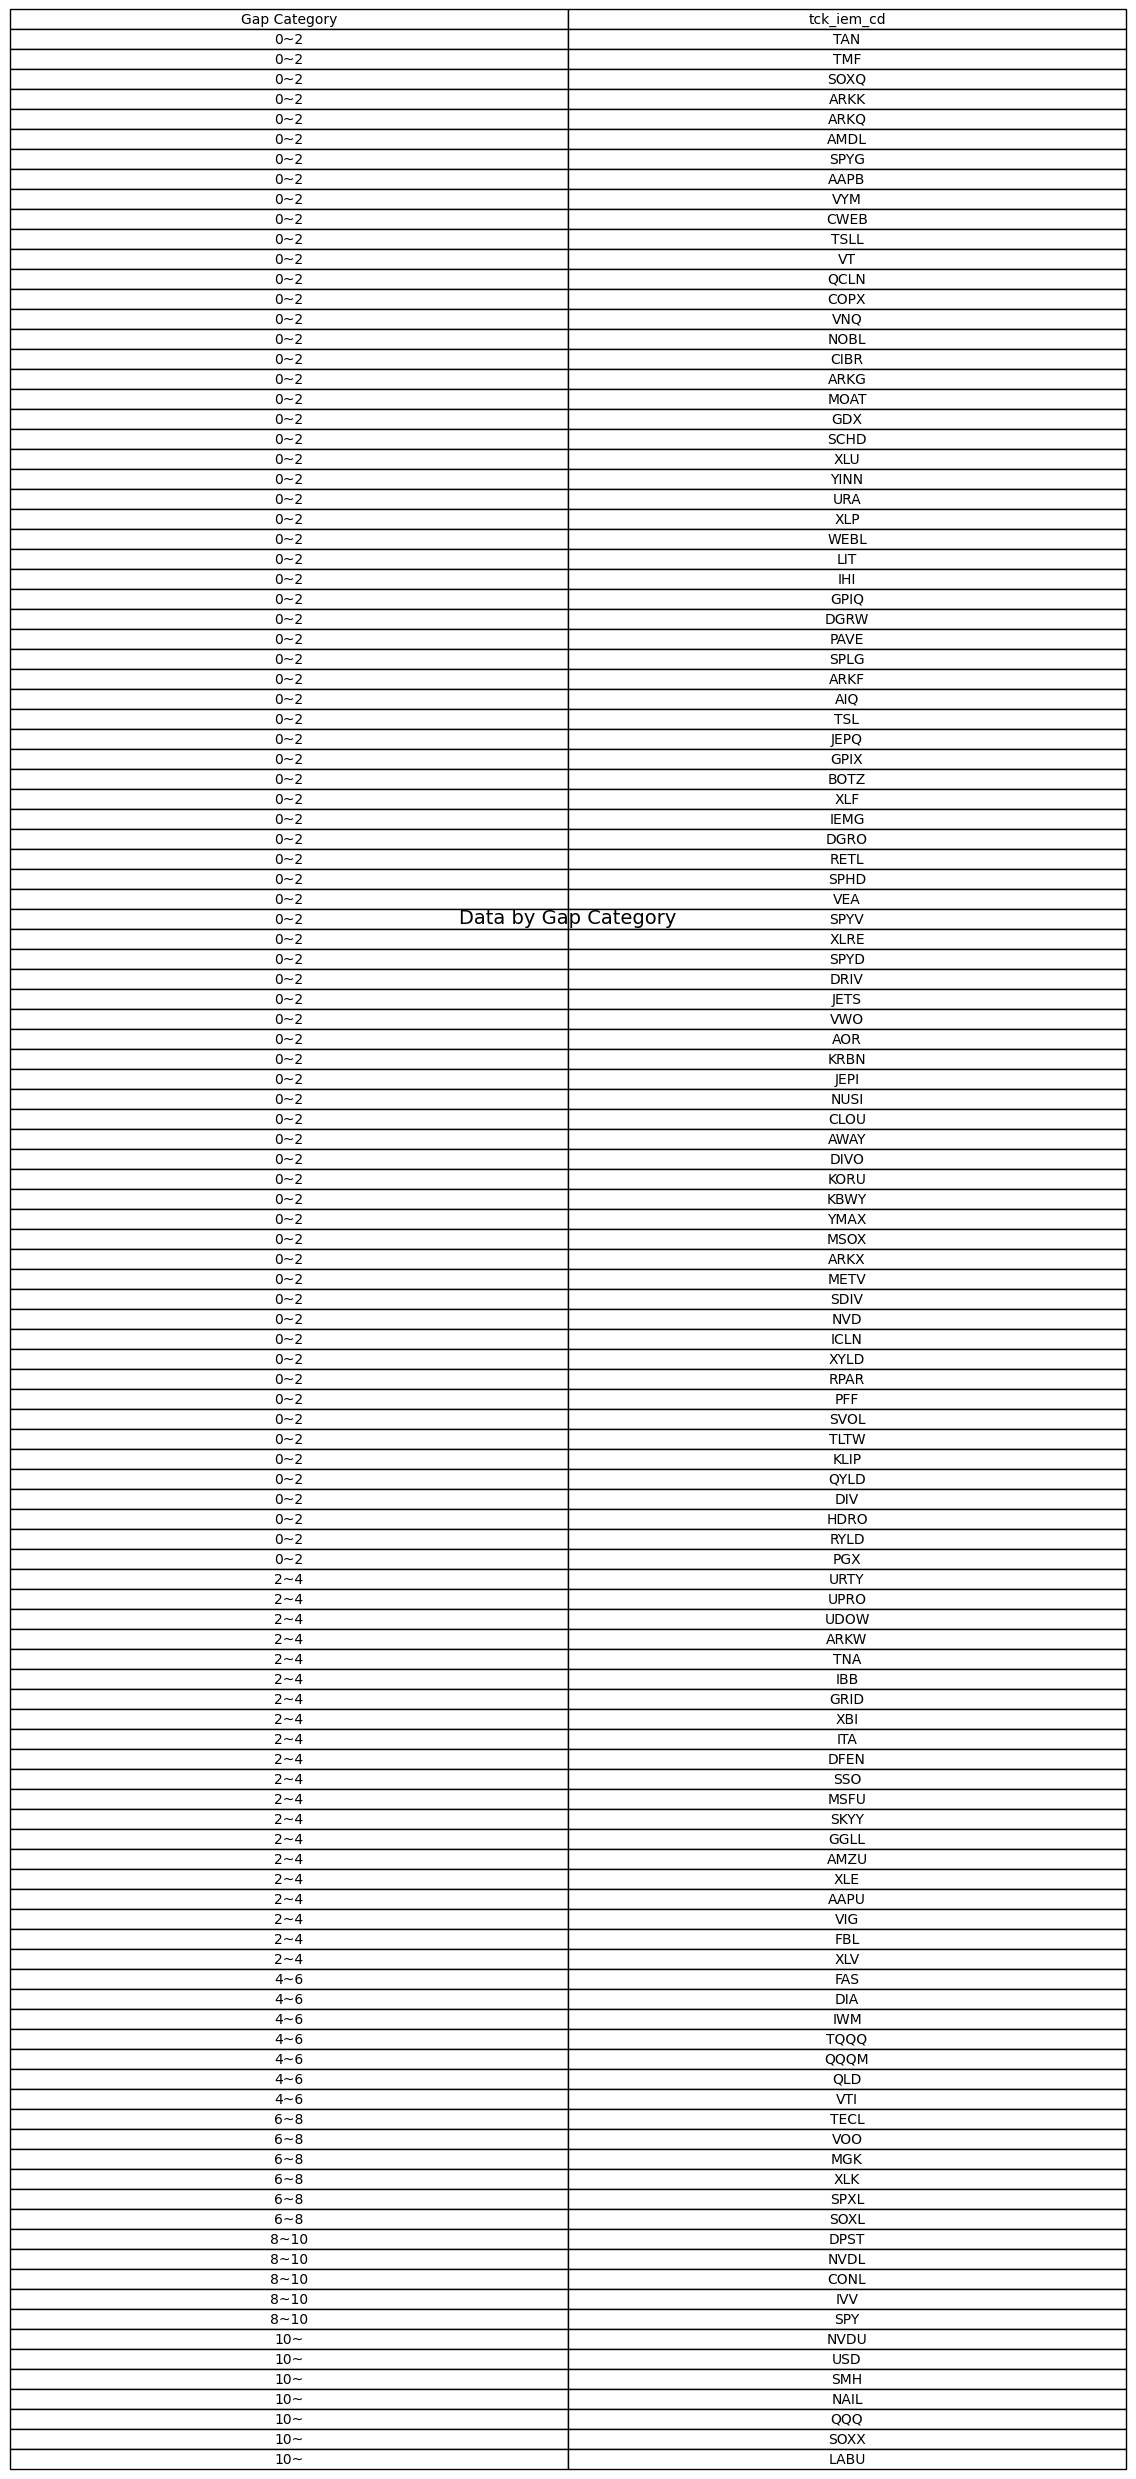

In [49]:
# 각 구간에 속하는 데이터 리스트 생성
gap_data = {label: sum_result_avg[sum_result_avg['gap_category'] == label]['tck_iem_cd'].tolist() for label in labels}

# 각 구간에 대한 데이터프레임 생성
gap_summary = pd.DataFrame({
    'Gap Category': labels,
    'tck_iem_cd': [', '.join(gap_data[label]) for label in labels],  # 리스트를 문자열로 변환
    'Count': [len(gap_data[label]) for label in labels]
})

gap_summary = pd.DataFrame(rows, columns=['Gap Category', 'tck_iem_cd'])

# 테이블 형태로 시각화
fig, ax = plt.subplots(figsize=(12, 8))  # 표 크기 조정
ax.axis('tight')
ax.axis('off')

# 테이블 생성
table_data = gap_summary.values
columns = gap_summary.columns.tolist()
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')

# 테이블 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# 그래프 제목 추가
plt.title('Data by Gap Category', fontsize=14)
plt.show()